O parâmetro 'binary' é usado para determinar se a correlação deve considerar apenas duas classes (por exemplo, 'fácil' e 'difícil') ou múltiplas classes (como 'fácil', 'médio' e 'difícil').

In [922]:
binary = False

Número de iterações que cada modelo vai fazer na função

In [923]:
n_iter_DecisionTreeRegressor=50
n_iter_SVR=50
n_iter_NuSVR=50
n_iter_RandomForestRegressor=50
n_iter_XGBRegressor=50

# Modelos de Regressão

In [924]:
import pandas as pd
import numpy as np
import seaborn as sns

In [925]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, precision_recall_fscore_support, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [926]:
ind_vars = pd.read_csv(r'..\code_metrics_professor_util.csv', index_col='question')
ind_vars = ind_vars.fillna(0)

ind_vars

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1018,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,1,1,2,1,1,1.00
1019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
1021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [927]:

dep_vars = pd.read_csv(r'Correlations_CSV\question_info.csv', index_col='question')

dep_vars = dep_vars.fillna(0)
dep_vars

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
question,,,,,,,,,,,
1002,3.645161,0.230088,4.193548,7.838710,2.806452,326.806452,38.322581,223.469538,169.903226,22.58,0.03
1018,3.483871,0.250000,7.419355,10.903226,2.612903,600.096774,73.645161,376.824519,287.645161,20.00,-0.01
1019,5.481481,0.162162,6.518519,12.000000,4.592593,605.000000,76.925926,292.271250,365.925926,17.24,-0.01
1020,5.357143,0.160000,12.857143,18.214286,4.500000,945.607143,136.714286,248.957875,456.285714,22.58,0.01
1021,2.680000,0.358209,7.800000,10.480000,1.720000,685.720000,101.680000,391.484083,289.280000,22.22,0.02
...,...,...,...,...,...,...,...,...,...,...,...
6834,2.526316,0.354167,7.105263,9.631579,1.631579,1171.842105,45.684211,74.967941,321.894737,25.00,0.06
6835,1.551724,0.600000,7.517241,9.068966,0.620690,772.793103,36.517241,0.000000,194.482759,21.21,0.09
6836,4.647059,0.189873,9.470588,14.117647,3.764706,1386.882353,61.647059,22.958867,479.529412,16.67,0.07


In [928]:
dep_vars.describe()

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,4.368552,0.256569,13.652348,18.020900,3.533988,1123.784137,86.721440,309.467706,472.299212,28.159831,0.052180
std,2.882986,0.148359,6.291119,8.056471,2.945517,782.156684,48.547818,284.913138,412.343512,18.214923,0.045476
min,1.117647,0.000000,1.607143,3.750000,0.117647,150.481481,7.185185,0.000000,11.800000,0.000000,-0.100000
25%,2.708497,0.146562,9.274125,12.144958,1.815476,710.879736,51.133677,96.856917,232.810623,14.290000,0.020000
50%,3.640000,0.232099,12.612903,16.656250,2.806452,960.736842,77.086957,212.213250,356.863636,25.000000,0.050000
75%,5.357143,0.335059,17.283482,22.298387,4.503012,1360.397025,111.940476,437.350709,582.830401,39.255000,0.080000
max,34.428571,0.894737,56.375000,62.187500,33.928571,9705.622222,311.622222,1469.860333,4458.157895,95.240000,0.170000


In [929]:
ind_vars = ind_vars.astype(np.float64)
dep_vars = dep_vars.astype(np.float64)

In [930]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

def plot_histogram(hst, base_dir="Figures", regression_dir="Regression"):
    """
    Recebe um gráfico de histograma (Axes) e salva em uma pasta específica, dependendo do valor de 'binary'.
    O nome da imagem é baseado no xlabel do gráfico, com espaços convertidos em underscores e caracteres especiais removidos.
    
    Parameters:
        hst (Axes): O objeto de gráfico criado com sns.histplot.
        binary (bool): Se True, o histograma será salvo na subpasta '2'. Se False, será salvo na subpasta '3'.
        base_dir (str): O diretório base para salvar os gráficos. Padrão é "Figures".
        regression_dir (str): O subdiretório base "Regression".
    """
    # Obter o título do gráfico (rótulo de X) e limpar o texto para o nome do arquivo
    xlabel = hst.get_xlabel()  # Obtém o texto do rótulo do eixo X
    filename = re.sub(r'[^a-zA-Z0-9_]', '', xlabel)  # Remove caracteres especiais
    filename = filename.replace(' ', '_')  # Substitui espaços por underscores
    
    # Definir a subpasta (2 ou 3) dependendo de `binary`
    subfolder = "2" if binary else "3"
    
    # Criar diretório para salvar o histograma dentro da subpasta correta
    hist_dir = os.path.join(base_dir, regression_dir, subfolder, "histogram")
    os.makedirs(hist_dir, exist_ok=True)
    
    # Caminho completo do arquivo para salvar
    hist_file_path = os.path.join(hist_dir, f"{filename}.png")

    # Salvar o gráfico
    plt.tight_layout()
    plt.savefig(hist_file_path, bbox_inches='tight')
    print(f"Gráfico do histograma salvo em: {hist_file_path}")
    plt.show()

## Distribuição de frequência

Gráfico do histograma salvo em: Figures\Regression\3\histogram\TaxadeErro.png


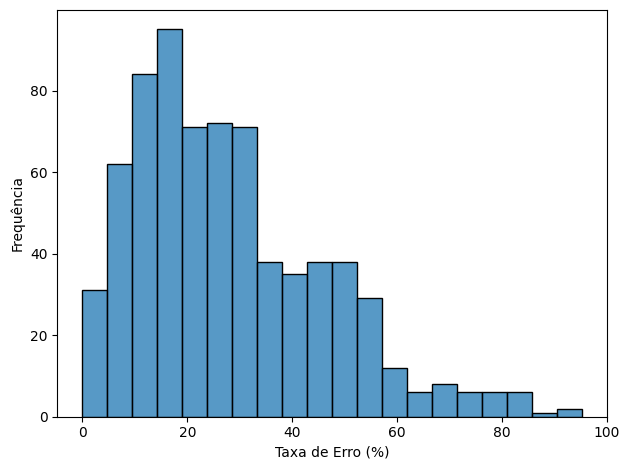

In [931]:
hst = sns.histplot(data=dep_vars['taxa de erro'] , bins=20)
sns.set_palette('dark')
hst.set_xlabel('Taxa de Erro (%)')
hst.set_ylabel('Frequência')

plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\3\histogram\Tempodeimplementaosegundos.png


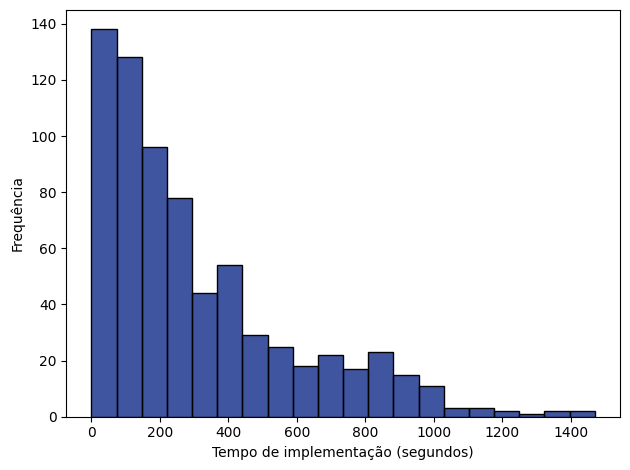

In [932]:
hst = sns.histplot(data=dep_vars['tempo_implementacao'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Tempo de implementação (segundos)')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\3\histogram\Nmerodeeventos.png


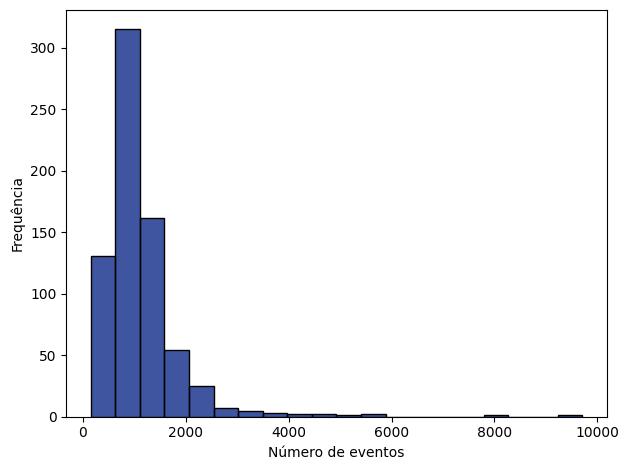

In [933]:
hst = sns.histplot(data=dep_vars['num_eventos'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Número de eventos')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

Gráfico do histograma salvo em: Figures\Regression\3\histogram\Quantidadedealteraesnocdigo.png


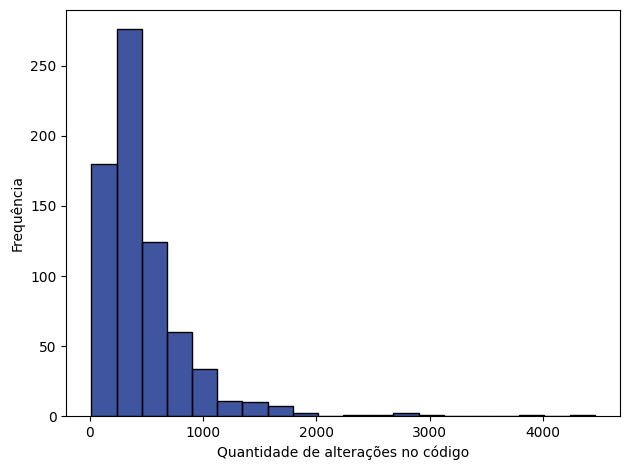

In [934]:
hst = sns.histplot(data=dep_vars['qtd_alteracoes_codigo'], bins=20)
sns.set_palette('dark')
hst.set_xlabel('Quantidade de alterações no código')
hst.set_ylabel('Frequência')


plot_histogram(hst, base_dir="Figures", regression_dir="Regression")

## Funções auxiliares

In [935]:
# Classificador de questões
def ternary_classify(rows, bounds):
    if len(bounds) != 2:
        raise Exception('quartiles must have 2 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'medio', 'dificil')

    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1] if row <= bounds[1] else
                      values[2]
                     )
    
def get_bounds_ternary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        q1 = 20.0  # Primeiro quartil (25%)
        q3 = 40.0 # Terceiro quartil (75%)
        return (q1, q3)
        #return (60.0, 85.0)


    else:
        return np.quantile(rows, q=[1/3, 2/3], method='midpoint')

In [936]:
def binary_classify(rows, bounds,  custom_classes=None):
    if len(bounds) != 1:
        raise Exception('bounds must have 1 value, {} were given'.format(len(bounds)))
        
    # Classes padrão ou personalizadas
    values = custom_classes if custom_classes else ('facil', 'dificil')

    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1])

    
def get_bounds_binary(rows, column_name):
    if column_name == 'taxa de erro':
        # Classificação do INEP
        return (40.0,)
    if column_name == 'discriminacao':
        # Classificação do INEP
        return (0.09,)
    else:
        return np.quantile(rows, q=[0.5], method='midpoint')

In [937]:
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cnf_matrix, title, binary=True, base_dir="Figures", regression_dir="Regression", discriminacao=False):
    """
    Plota a matriz de confusão, exibe o gráfico e o salva em uma pasta específica baseada no valor de `binary` e `discriminacao`.

    Parameters:
        cnf_matrix (array-like): A matriz de confusão.
        title (str): O título do gráfico.
        binary (bool): Define a subpasta e o nome do arquivo. True -> Regression/2, False -> Regression/3.
        base_dir (str): O diretório base para salvar os gráficos. Padrão é "Figures".
        regression_dir (str): O subdiretório base "Regression".
        discriminacao (bool): Define se as classes são 'fraco' e 'muito fraco'. Substitui o valor de `binary` se True.
    """
    # Configurar as classes com base nos parâmetros
    if discriminacao:
        classes = ['muito fraco', 'fraco']
        sub_dir = os.path.join(regression_dir, "discriminacao")
        file_name = "matriz_confusao_discriminacao.png"
    else:
        classes = ['fácil', 'difícil'] if binary else ['fácil', 'médio', 'difícil']
        sub_dir = os.path.join(regression_dir, "2" if binary else "3")
        file_name = f"matriz_confusao_{'2' if binary else '3'}.png"

    # Criar o caminho completo
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)
    
    file_path = os.path.join(full_sub_dir, file_name)

    # Configurar o estilo e criar o gráfico
    plt.figure()
    plt.style.use('default')
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    # Configurar os ticks e rótulos
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adicionar valores na matriz
    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe predita')
    plt.xlabel('Classe verdadeira')

    # Salvar o gráfico no arquivo especificado
    plt.savefig(file_path, bbox_inches='tight')

    # Informar onde o arquivo foi salvo
    print(f"Gráfico salvo em: {file_path}")

    plt.show()


In [938]:
def relative_squared_error(y_true, y_pred):
    return np.sum(np.square(np.subtract(y_true,y_pred))) / np.sum(np.square(np.subtract(y_true, np.mean(y_true))))



def relative_absolute_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

def r2_adjusted(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

In [939]:
def cross_val_train(ind_vars, y, model, binary_class):    
    # Escolha das funções de classificação
    bounds_fn = get_bounds_binary if binary_class else get_bounds_ternary
    classify_fn = binary_classify if binary_class else ternary_classify
    
    predicted_list = []
    tested_list = []
    
    cat_predicted_list = []
    cat_tested_list = []
    
    n_folds = 4
    kf = KFold(n_folds, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(ind_vars):
        X_train, X_test = ind_vars.iloc[train_index], ind_vars.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Limites e classificação personalizados para 'discriminacao'
        if y.name == 'discriminacao':
            bounds = get_bounds_binary(y_train, y_train.name)
            classify = lambda rows, b: binary_classify(rows, b, custom_classes=('muito fraco', 'fraco'))
        else:
            bounds = bounds_fn(y_train, y_train.name)
            classify = classify_fn
        
        y_true = classify(y_test, bounds)
        
        model.fit(X_train, y_train)
    
        y_pred = pd.Series(model.predict(X_test))
        classified_pred = classify(y_pred, bounds)
        
        predicted_list = np.append(predicted_list, y_pred)
        tested_list = np.append(tested_list, y_test)
        
        cat_predicted_list = np.append(cat_predicted_list, classified_pred)
        cat_tested_list = np.append(cat_tested_list, y_true)
    
    final_scores = {}
    final_scores['mae'] = mean_absolute_error(tested_list, predicted_list)
    final_scores['rae'] = relative_absolute_error(tested_list, predicted_list)
    final_scores['rse'] = relative_squared_error(tested_list, predicted_list)
    final_scores['r2'] = r2_score(tested_list, predicted_list)
    
    # Classes personalizadas apenas para 'discriminacao'
    if y.name == 'discriminacao':
        classes = ('muito fraco', 'fraco')
    else:
        classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')
    
    cnf_matrix = confusion_matrix(cat_tested_list, cat_predicted_list, labels=classes)
        
    return final_scores, cnf_matrix


In [ ]:
def model_train_search_cv(
        df, dep_vars, model, model_class, distributions, n_iter,
        transform_fn=None, transform_by_column=False, binary_class=True
    ):
    # Definindo as colunas para os resultados
    results_col = ['mae', 'rae', 'rse', 'r2']
    
    # Garantindo que o DataFrame 'results' use float64
    results = pd.DataFrame(0, index=dep_vars.columns, columns=results_col, dtype=np.float64)
    cnf_matrixes = {}
    
    # Aplicando a transformação se necessário
    transformed_df = df.copy()
    if transform_fn and not transform_by_column:
        transformed_df = pd.DataFrame(transform_fn(transformed_df))
        
    # Validando o DataFrame transformado
    assert np.isfinite(transformed_df.values).all(), "Dados de entrada contêm valores inválidos (NaN ou Inf)."
    
    # Iterando pelas colunas do DataFrame de variáveis dependentes
    for col in dep_vars.columns:
        if transform_fn and transform_by_column:
            transformed_df = pd.DataFrame(transform_fn(df, col))
        
        # Verificando valores na variável dependente
        assert np.isfinite(dep_vars[col].values).all(), f"A variável dependente '{col}' contém valores inválidos (NaN ou Inf)."
        
        # RandomizedSearchCV para busca de hiperparâmetros
        clf = RandomizedSearchCV(
            estimator=model, 
            param_distributions=distributions, 
            random_state=42, 
            cv=4, 
            n_iter=n_iter, 
            n_jobs=-1,
            scoring='neg_mean_absolute_error',
            return_train_score=True
        )
        
        # Ajustando o modelo
        search = clf.fit(transformed_df, dep_vars[col])
        best_params = {key.split('__')[-1]: value for key, value in search.best_params_.items()}
        print('best params for {}: {}'.format(col, best_params))
        
        # Criando o modelo com os melhores parâmetros
        best_model = model_class(**best_params)
        
        # Treinando com validação cruzada
        metric_train_result, cnf_matrix = cross_val_train(df, dep_vars[col], best_model, binary_class)
        
        # Convertendo explicitamente para float para evitar problemas de compatibilidade
        # Substituindo NaN ou Inf por 0
        results.loc[col] = [float(np.nan_to_num(metric_train_result.get(k, 0), nan=0, posinf=0, neginf=0)) for k in results_col]
        
        cnf_matrixes[col] = cnf_matrix
        
    # Retornando os resultados ordenados e as matrizes de confusão
    return results.sort_values(by=['r2', 'rse'], ascending=False), cnf_matrixes


In [941]:
def push_results(results, df_results: pd.DataFrame, model):
    results[model] = dict()
    for dep_var, metrics in df_results.iterrows():
        results[model][dep_var] = metrics

In [942]:
results = dict()

### Árvore de Regressão

In [943]:
from sklearn.tree import DecisionTreeRegressor

In [944]:
from sklearn.tree import DecisionTreeRegressor

criterion = ['squared_error', 'friedman_mse', 'absolute_error']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2', None]  # Adicionado 'None'
random_state = [42, 0, 7]  # Adicionados mais valores

# Espaço de busca expandido
distributions = dict(
    criterion=criterion,
    splitter=splitter,
    max_features=max_features,
    random_state=random_state
)

model = DecisionTreeRegressor(random_state=42)
ans, cnf_matrixes_dtr = model_train_search_cv(ind_vars, dep_vars, model, DecisionTreeRegressor, distributions, n_iter_DecisionTreeRegressor, binary_class=binary)
push_results(results, ans, 'Regression Tree')
ans

best params for num_submissoes: {'splitter': 'best', 'random_state': 7, 'max_features': 'log2', 'criterion': 'squared_error'}
best params for taxa_aceitacao: {'splitter': 'random', 'random_state': 7, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}
best params for num_testes: {'splitter': 'best', 'random_state': 0, 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_consultas: {'splitter': 'best', 'random_state': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_erros: {'splitter': 'random', 'random_state': 7, 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_eventos: {'splitter': 'random', 'random_state': 0, 'max_features': None, 'criterion': 'friedman_mse'}
best params for num_eventos_del: {'splitter': 'best', 'random_state': 7, 'max_features': None, 'criterion': 'squared_error'}
best params for tempo_implementacao: {'splitter': 'random', 'random_state': 7, 'max_features': 'sqrt', 'criterion': 'squared_erro

,mae,rae,rse,r2
qtd_alteracoes_codigo,179.580531,0.686113,0.595625,0.404375
num_eventos_del,27.939547,0.750248,0.627419,0.372581
discriminacao,0.025636,0.686205,0.653470,0.346530
tempo_implementacao,156.931878,0.697066,0.702975,0.297025
num_eventos,373.151302,0.785827,0.769143,0.230857
taxa de erro,11.566463,0.794562,0.775939,0.224061
taxa_aceitacao,0.098926,0.855400,0.823128,0.176872
num_testes,4.210829,0.864235,0.831700,0.168300
num_consultas,5.430369,0.875474,0.908712,0.091288
num_submissoes,1.779611,0.962931,1.029488,-0.029488


In [945]:
cnf_matrixes_dtr['discriminacao']

array([[511,  62],
       [ 37, 101]])

In [946]:
cnf_matrixes_dtr['taxa de erro']

array([[196,  77,  13],
       [ 71, 146,  37],
       [ 21,  70,  80]])

Gráfico salvo em: Figures\Regression\discriminacao\matriz_confusao_discriminacao.png


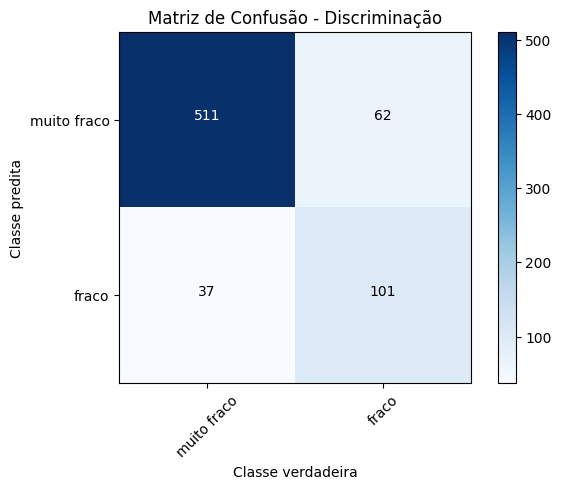

In [947]:
plot_confusion_matrix(cnf_matrixes_dtr['discriminacao'], 'Matriz de Confusão - Discriminação', discriminacao=True)


### SVR

In [948]:
from sklearn.svm import SVR

In [949]:
kernel = ['rbf', 'poly']
degree = [2,3]
tol = np.linspace(start=1e-5, stop=1e-3, num=10)
epsilon = np.linspace(start=1e-3, stop=1, num=10)
C = np.linspace(start=1, stop=1000, num=10)

distributions = dict(
    kernel = kernel,
    degree = degree,
    tol = tol,
    epsilon = epsilon,
    C = C,
)
distributions

{'kernel': ['rbf', 'poly'],
 'degree': [2, 3],
 'tol': array([1.0e-05, 1.2e-04, 2.3e-04, 3.4e-04, 4.5e-04, 5.6e-04, 6.7e-04,
        7.8e-04, 8.9e-04, 1.0e-03]),
 'epsilon': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
        1.   ]),
 'C': array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
        1000.])}

In [950]:
model = SVR()

In [951]:
ans, cnf_matrixes_svr = model_train_search_cv(ind_vars, dep_vars, model, SVR, distributions, n_iter_SVR, binary_class=binary)
push_results(results, ans, 'SVR')
ans

best params for num_submissoes: {'tol': np.float64(0.0005600000000000001), 'kernel': 'rbf', 'epsilon': np.float64(0.001), 'degree': 3, 'C': np.float64(1.0)}
best params for taxa_aceitacao: {'tol': np.float64(0.0005600000000000001), 'kernel': 'rbf', 'epsilon': np.float64(0.001), 'degree': 3, 'C': np.float64(1.0)}
best params for num_testes: {'tol': np.float64(0.001), 'kernel': 'rbf', 'epsilon': np.float64(0.001), 'degree': 3, 'C': np.float64(889.0)}
best params for num_consultas: {'tol': np.float64(0.00034), 'kernel': 'rbf', 'epsilon': np.float64(1.0), 'degree': 3, 'C': np.float64(556.0)}
best params for num_erros: {'tol': np.float64(0.0005600000000000001), 'kernel': 'rbf', 'epsilon': np.float64(0.001), 'degree': 3, 'C': np.float64(1.0)}
best params for num_eventos: {'tol': np.float64(0.00012), 'kernel': 'poly', 'epsilon': np.float64(0.667), 'degree': 2, 'C': np.float64(556.0)}
best params for num_eventos_del: {'tol': np.float64(1e-05), 'kernel': 'poly', 'epsilon': np.float64(0.334), 'd

,mae,rae,rse,r2
qtd_alteracoes_codigo,182.683740,0.697969,0.428530,0.571470
taxa de erro,11.110862,0.763265,0.686207,0.313793
num_testes,3.950548,0.810814,0.693085,0.306915
num_consultas,5.170576,0.833590,0.734950,0.265050
discriminacao,0.030811,0.824749,0.773158,0.226842
num_eventos_del,33.111423,0.889125,0.785250,0.214750
num_eventos,428.134889,0.901618,0.897748,0.102252
taxa_aceitacao,0.102911,0.889853,0.911584,0.088416
num_erros,1.674478,0.878514,0.944160,0.055840
tempo_implementacao,196.386941,0.872319,0.952569,0.047431


### NuSVR

In [952]:
from sklearn.svm import NuSVR

In [953]:
nu = np.linspace(start=0.1, stop=0.5, num=10)
C = np.linspace(start=1, stop=100, num=10)
kernel = ['rbf', 'poly']
degree = [2,3]
         
distributions = dict(
    nu = nu,
    C = C,
    kernel = kernel,
    degree = degree,
)
distributions 

{'nu': array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
        0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ]),
 'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]),
 'kernel': ['rbf', 'poly'],
 'degree': [2, 3]}

In [954]:
model = NuSVR()

In [955]:
ans, cnf_matrixes_nsvr = model_train_search_cv(ind_vars, dep_vars, model, NuSVR, distributions, n_iter_NuSVR, binary_class=binary)
push_results(results, ans, 'NuSVR')
ans

best params for num_submissoes: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(56.0)}
best params for taxa_aceitacao: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(89.0)}
best params for num_testes: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(1.0)}
best params for num_consultas: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(1.0)}
best params for num_erros: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(56.0)}
best params for num_eventos: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(56.0)}
best params for num_eventos_del: {'nu': np.float64(0.3666666666666667), 'kernel': 'poly', 'degree': 2, 'C': np.float64(100.0)}
best params for tempo_implementacao: {'nu': np.float64(0.5), 'kernel': 'rbf', 'degree': 2, 'C': np.float64(89.0)}
best params for qtd_alteracoes_codigo: {'nu': np.float64(0.3666666666666667), 'kernel': 'poly', 'degree': 2, 'C': np.flo

,mae,rae,rse,r2
qtd_alteracoes_codigo,198.484076,0.758337,0.440321,0.559679
num_eventos_del,32.070364,0.861170,0.705529,0.294471
taxa_aceitacao,0.094772,0.819479,0.741496,0.258504
discriminacao,0.030896,0.827018,0.747810,0.252190
taxa de erro,12.387009,0.850930,0.789211,0.210789
num_testes,4.498570,0.923291,0.843938,0.156062
num_consultas,5.745125,0.926218,0.845940,0.154060
num_erros,1.638275,0.859520,0.872816,0.127184
num_submissoes,1.586086,0.858216,0.877147,0.122853
num_eventos,428.053977,0.901448,0.910506,0.089494


### Random Forest

In [956]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = np.linspace(start=100, stop=1000, num=10, dtype=int)
criterion = ['squared_error', 'absolute_error']
max_features = ['sqrt', 'log2', None]
random_state = [42]

distributions = dict(
    n_estimators = n_estimators,
    criterion = criterion,
    max_features = max_features,
    random_state = random_state
)
distributions

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 'criterion': ['squared_error', 'absolute_error'],
 'max_features': ['sqrt', 'log2', None],
 'random_state': [42]}

In [957]:
model = RandomForestRegressor()

In [958]:
ans, cnf_matrixes_rfr = model_train_search_cv(ind_vars, dep_vars, model, RandomForestRegressor, distributions, n_iter_RandomForestRegressor, binary_class=binary)
push_results(results, ans, 'Random Forest')
ans

best params for num_submissoes: {'random_state': 42, 'n_estimators': np.int64(100), 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': np.int64(200), 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_testes: {'random_state': 42, 'n_estimators': np.int64(100), 'max_features': 'sqrt', 'criterion': 'squared_error'}
best params for num_consultas: {'random_state': 42, 'n_estimators': np.int64(200), 'max_features': 'sqrt', 'criterion': 'absolute_error'}
best params for num_erros: {'random_state': 42, 'n_estimators': np.int64(900), 'max_features': 'log2', 'criterion': 'absolute_error'}
best params for num_eventos: {'random_state': 42, 'n_estimators': np.int64(200), 'max_features': 'log2', 'criterion': 'squared_error'}
best params for num_eventos_del: {'random_state': 42, 'n_estimators': np.int64(400), 'max_features': None, 'criterion': 'squared_error'}
best params for tempo_implementacao: {'random

,mae,rae,rse,r2
qtd_alteracoes_codigo,145.545539,0.556078,0.302262,0.697738
discriminacao,0.020997,0.562035,0.390500,0.609500
num_eventos_del,24.443422,0.656368,0.458266,0.541734
tempo_implementacao,133.096761,0.591194,0.469533,0.530467
taxa de erro,9.596258,0.659218,0.508790,0.491210
num_testes,3.529333,0.724364,0.570699,0.429301
num_consultas,4.498094,0.725174,0.584028,0.415972
taxa_aceitacao,0.087777,0.758992,0.591051,0.408949
num_eventos,349.881260,0.736822,0.679197,0.320803
num_erros,1.493554,0.783592,0.789545,0.210455


In [959]:
cnf_matrixes_rfr

{'num_submissoes': array([[ 90, 111,  34],
        [ 31, 136,  71],
        [  7,  80, 151]]),
 'taxa_aceitacao': array([[ 92, 128,  15],
        [ 33, 155,  53],
        [  6,  99, 130]]),
 'num_testes': array([[102, 117,  16],
        [ 30, 166,  41],
        [  7,  97, 135]]),
 'num_consultas': array([[105, 123,   9],
        [ 39, 163,  35],
        [  4, 128, 105]]),
 'num_erros': array([[100, 103,  32],
        [ 31, 135,  73],
        [  7,  79, 151]]),
 'num_eventos': array([[ 88, 127,  20],
        [ 29, 158,  50],
        [  5,  74, 160]]),
 'num_eventos_del': array([[124, 101,  16],
        [ 36, 143,  50],
        [  6,  90, 145]]),
 'tempo_implementacao': array([[130,  95,  11],
        [ 35, 167,  40],
        [  2,  60, 171]]),
 'qtd_alteracoes_codigo': array([[127, 100,   9],
        [ 25, 183,  27],
        [  0, 100, 140]]),
 'taxa de erro': array([[174, 108,   4],
        [ 34, 204,  16],
        [  1,  90,  80]]),
 'discriminacao': array([[530,  43],
        [ 39,  

### XGB

In [960]:
from xgboost import XGBRegressor

In [961]:
model = XGBRegressor()

In [962]:
n_estimators = np.linspace(start=100, stop=500, num=10, dtype=int)
max_depth = np.linspace(start=3, stop=15, num=15, dtype=int)
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = np.linspace(start=0.1, stop=1.0, num=10, dtype=np.float64)
distributions = dict(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample)
distributions

{'n_estimators': array([100, 144, 188, 233, 277, 322, 366, 411, 455, 500]),
 'max_depth': array([ 3,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 15]),
 'eta': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [963]:
ans, cnf_matrixes_xbgr = model_train_search_cv(ind_vars, dep_vars, model, XGBRegressor, distributions, n_iter_XGBRegressor, binary_class=binary)
push_results(results, ans, model='Extreme Gradient Boosting')
ans

best params for num_submissoes: {'subsample': np.float64(0.6), 'n_estimators': np.int64(455), 'max_depth': np.int64(5), 'eta': 0.01}
best params for taxa_aceitacao: {'subsample': np.float64(0.7000000000000001), 'n_estimators': np.int64(188), 'max_depth': np.int64(15), 'eta': 0.01}
best params for num_testes: {'subsample': np.float64(0.7000000000000001), 'n_estimators': np.int64(188), 'max_depth': np.int64(15), 'eta': 0.01}
best params for num_consultas: {'subsample': np.float64(0.5), 'n_estimators': np.int64(277), 'max_depth': np.int64(6), 'eta': 0.01}
best params for num_erros: {'subsample': np.float64(0.6), 'n_estimators': np.int64(455), 'max_depth': np.int64(5), 'eta': 0.01}
best params for num_eventos: {'subsample': np.float64(0.2), 'n_estimators': np.int64(500), 'max_depth': np.int64(9), 'eta': 0.001}
best params for num_eventos_del: {'subsample': np.float64(0.9), 'n_estimators': np.int64(411), 'max_depth': np.int64(11), 'eta': 0.1}
best params for tempo_implementacao: {'subsample

,mae,rae,rse,r2
qtd_alteracoes_codigo,150.292984,0.574216,0.318736,0.681264
discriminacao,0.020945,0.560645,0.380015,0.619985
num_eventos_del,25.412891,0.682400,0.501215,0.498785
taxa de erro,10.275593,0.705886,0.549987,0.450013
taxa_aceitacao,0.086943,0.751784,0.574908,0.425092
num_testes,3.591440,0.737111,0.586021,0.413979
num_consultas,4.604097,0.742264,0.601447,0.398553
tempo_implementacao,173.333484,0.769919,0.624141,0.375859
num_eventos,412.579052,0.868859,0.813538,0.186462
num_erros,1.567650,0.822467,0.821629,0.178371


## Resultados

In [964]:
n, k = ind_vars.shape[0], dep_vars.shape[1]
columns = ['classificador', 'r2_adjusted', 'mae', 'rae', 'rse', 'r2']
best_metrics = pd.DataFrame(-np.inf, index=dep_vars.columns, columns=columns)
for model, metrics in results.items():
    for metric, data in metrics.items():
        cur = best_metrics.loc[metric]
        r2_adjusted_score = r2_adjusted(data['r2'], n, k)
        if r2_adjusted_score > cur['r2_adjusted']:
            best_metrics.loc[metric] = model, r2_adjusted_score, *data
best_metrics.sort_values(by=['r2_adjusted'], ascending=False)

C:\Users\thiag\AppData\Local\Temp\ipykernel_20780\3756411867.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Regression Tree' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  best_metrics.loc[metric] = model, r2_adjusted_score, *data


,classificador,r2_adjusted,mae,rae,rse,r2
qtd_alteracoes_codigo,Random Forest,0.692981,145.545539,0.556078,0.302262,0.697738
discriminacao,Extreme Gradient Boosting,0.614005,0.020945,0.560645,0.380015,0.619985
num_eventos_del,Random Forest,0.534523,24.443422,0.656368,0.458266,0.541734
tempo_implementacao,Random Forest,0.523078,133.096761,0.591194,0.469533,0.530467
taxa de erro,Random Forest,0.483204,9.596258,0.659218,0.508790,0.491210
num_testes,Random Forest,0.420320,3.529333,0.724364,0.570699,0.429301
taxa_aceitacao,Extreme Gradient Boosting,0.416045,0.086943,0.751784,0.574908,0.425092
num_consultas,Random Forest,0.406781,4.498094,0.725174,0.584028,0.415972
num_eventos,Random Forest,0.310115,349.881260,0.736822,0.679197,0.320803
num_erros,Random Forest,0.198030,1.493554,0.783592,0.789545,0.210455


In [965]:
import os

def save_best_metrics_to_csv(best_metrics, base_dir="Regression_CSV", file_name="best_metrics.csv"):
    """
    Salva o DataFrame 'best_metrics' em um arquivo CSV com uma nova coluna 'metricas',
    que conterá os valores do índice atual do DataFrame.

    Parameters:
        best_metrics (pd.DataFrame): O DataFrame contendo as métricas com índice como 'qtd_alteracoes_codigo', etc.
        base_dir (str): O diretório base onde o arquivo CSV será salvo. Padrão é "Regression_CSV".
        file_name (str): O nome do arquivo CSV. Padrão é "best_metrics.csv".
        binary (bool): Determina a subpasta a ser usada. Se True, cria a subpasta "2", se False, cria "3".
    """
    # Determinar a subpasta com base no valor de `binary`
    sub_dir = "2" if binary else "3"

    # Criar o caminho completo
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)

    # Caminho completo para o arquivo CSV
    csv_file_path = os.path.join(full_sub_dir, file_name)

    # Resetar o índice e transformá-lo na coluna 'metricas'
    best_metrics = best_metrics.reset_index()
    best_metrics.rename(columns={'index': 'metricas'}, inplace=True)

    best_metrics = best_metrics.round(2)

    # Salvar o DataFrame como CSV
    best_metrics.to_csv(csv_file_path, index=False)

    # Imprimir o caminho onde o arquivo foi salvo
    print(f"Arquivo CSV salvo em: {csv_file_path}")


In [966]:


save_best_metrics_to_csv(best_metrics, base_dir="Regression_CSV", file_name="Best_Metrics_Regression.csv")


Arquivo CSV salvo em: Regression_CSV\3\Best_Metrics_Regression.csv


In [967]:
import pandas as pd

def read_best_metrics(file_path):
    """
    Lê o arquivo CSV de métricas e retorna um DataFrame.

    Parameters:
        file_path (str): O caminho completo para o arquivo CSV.

    Returns:
        pd.DataFrame: O DataFrame contendo os dados do arquivo CSV.
    """
    try:
        # Ler o arquivo CSV
        best_metrics = pd.read_csv(file_path)

        return best_metrics
    except FileNotFoundError:
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")




In [968]:
file_path = r"Regression_CSV\2\Best_Metrics_Regression.csv"
if os.path.exists(file_path):

    best_metrics_df = read_best_metrics(file_path)
    display(best_metrics_df)

,metricas,classificador,r2_adjusted,mae,rae,rse,r2
0,num_submissoes,Random Forest,0.18,1.47,0.80,0.81,0.19
1,taxa_aceitacao,Extreme Gradient Boosting,0.42,0.09,0.75,0.57,0.43
2,num_testes,Random Forest,0.42,3.53,0.72,0.57,0.43
3,num_consultas,Random Forest,0.41,4.50,0.73,0.58,0.42
4,num_erros,Random Forest,0.20,1.49,0.78,0.79,0.21
5,num_eventos,Random Forest,0.31,349.88,0.74,0.68,0.32
6,num_eventos_del,Random Forest,0.53,24.44,0.66,0.46,0.54
7,tempo_implementacao,Random Forest,0.52,133.10,0.59,0.47,0.53
8,qtd_alteracoes_codigo,Random Forest,0.69,145.55,0.56,0.30,0.70
9,taxa de erro,Random Forest,0.48,9.60,0.66,0.51,0.49


In [969]:
file_path_2 = r"Regression_CSV\3\Best_Metrics_Regression.csv"
if os.path.exists(file_path_2):
    best_metrics_df = read_best_metrics(file_path_2)
    display(best_metrics_df)


   

,metricas,classificador,r2_adjusted,mae,rae,rse,r2
0,num_submissoes,Random Forest,0.18,1.47,0.80,0.81,0.19
1,taxa_aceitacao,Extreme Gradient Boosting,0.42,0.09,0.75,0.57,0.43
2,num_testes,Random Forest,0.42,3.53,0.72,0.57,0.43
3,num_consultas,Random Forest,0.41,4.50,0.73,0.58,0.42
4,num_erros,Random Forest,0.20,1.49,0.78,0.79,0.21
5,num_eventos,Random Forest,0.31,349.88,0.74,0.68,0.32
6,num_eventos_del,Random Forest,0.53,24.44,0.66,0.46,0.54
7,tempo_implementacao,Random Forest,0.52,133.10,0.59,0.47,0.53
8,qtd_alteracoes_codigo,Random Forest,0.69,145.55,0.56,0.30,0.70
9,taxa de erro,Random Forest,0.48,9.60,0.66,0.51,0.49
